In [404]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score 
from sklearn.svm import SVC

In [317]:
#Dataset from https://archive.ics.uci.edu/ml/datasets/Student+Performance

In [318]:
df = pd.read_csv('student_perf.csv')
print(df.head(3))

   Unnamed: 0 school sex  age address famsize Pstatus  Medu  Fedu     Mjob  \
0           1     GP   F   18       U     GT3       A     4     4  at_home   
1           2     GP   F   17       U     GT3       T     1     1  at_home   
2           3     GP   F   15       U     LE3       T     1     1  at_home   

  ... famrel freetime goout  Dalc  Walc  health absences G1 G2  G3  
0 ...      4        3     4     1     1       3        6  5  6   6  
1 ...      5        3     3     1     1       3        4  5  5   6  
2 ...      4        3     2     2     3       3       10  7  8  10  

[3 rows x 34 columns]


In [319]:
df.describe()

,Unnamed: 0,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,198.000000,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,114.170924,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,1.000000,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,99.500000,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,198.000000,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,296.500000,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,395.000000,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [320]:
g1 = df['G1']
g2 = df['G2']
g3 = df['G3']
st = df['studytime']
tt = df['traveltime']
gt = df['goout']
health = df['health']
ab = df['absences']
Dalco = df['Dalc']
Walco = df['Walc']
roma = df['romantic']

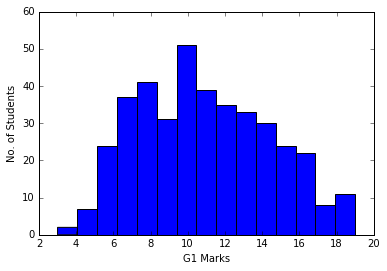

In [321]:
plt.hist(g1, bins = 15)
plt.xlabel('G1 Marks')
plt.ylabel('No. of Students')

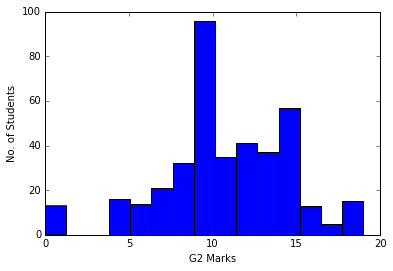

In [322]:
plt.hist(g2, bins = 15)
plt.xlabel('G2 Marks')
plt.ylabel('No. of Students')

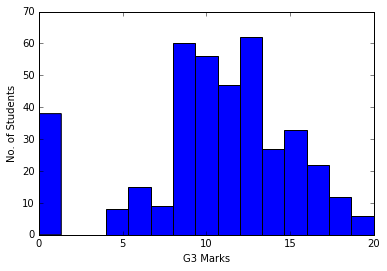

In [323]:
plt.hist(g3, bins = 15)
plt.xlabel('G3 Marks')
plt.ylabel('No. of Students')

Correlation Matrix
[[ 1.          0.09781969]
 [ 0.09781969  1.        ]]


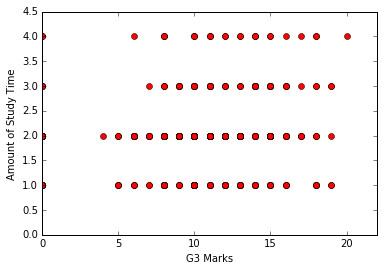

In [324]:
plt.plot(g3,st,'ro')
plt.axis(ymin = 0, ymax = 4.5, xmin = 0, xmax = 22)
plt.xlabel('G3 Marks')
plt.ylabel('Amount of Study Time')
c = np.corrcoef(g3,st)
print("Correlation Matrix")
print(c)

Correlation Matrix
[[ 1.         -0.11714205]
 [-0.11714205  1.        ]]


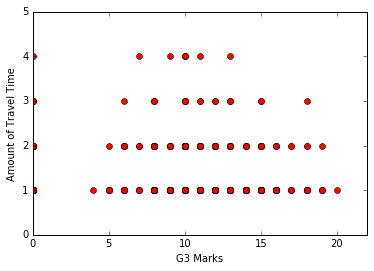

In [325]:
plt.plot(g3,tt,'ro')
plt.axis(ymin = 0, ymax = 5, xmin = 0, xmax = 22)
plt.xlabel('G3 Marks')
plt.ylabel('Amount of Travel Time')
c = np.corrcoef(g3,tt)
print("Correlation Matrix")
print(c)

Correlation Matrix
[[ 1.         -0.13279147]
 [-0.13279147  1.        ]]


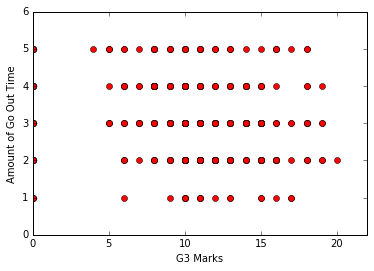

In [326]:
plt.plot(g3,gt,'ro')
plt.axis(ymin = 0, ymax = 6, xmin = 0, xmax = 22)
plt.xlabel('G3 Marks')
plt.ylabel('Amount of Go Out Time')
c = np.corrcoef(g3,gt)
print("Correlation Matrix")
print(c)

Correlation Matrix
[[ 1.        -0.0613346]
 [-0.0613346  1.       ]]


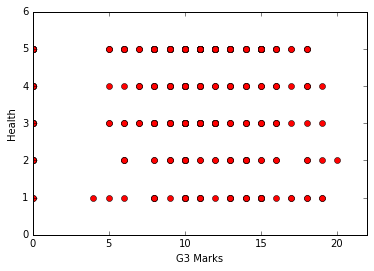

In [327]:
plt.plot(g3,health,'ro')
plt.axis(ymin = 0, ymax = 6, xmin = 0, xmax = 22)
plt.xlabel('G3 Marks')
plt.ylabel('Health')
c = np.corrcoef(g3,health)
print("Correlation Matrix")
print(c)

Correlation Matrix
[[ 1.          0.03424732]
 [ 0.03424732  1.        ]]


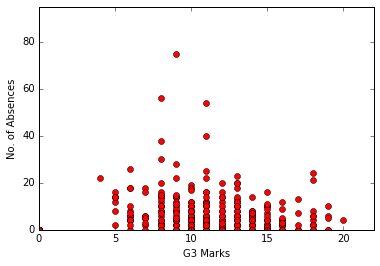

In [328]:
plt.plot(g3,ab,'ro')
plt.axis(xmax = 22,ymax = 95)
plt.xlabel('G3 Marks')
plt.ylabel('No. of Absences')
c = np.corrcoef(g3,ab)
print("Correlation Matrix")
print(c)

Correlation Matrix
[[ 1.          0.80146793]
 [ 0.80146793  1.        ]]


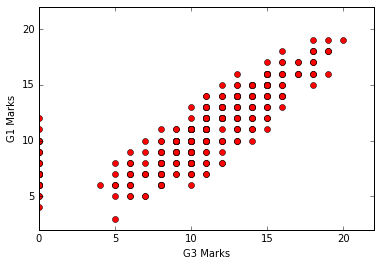

In [329]:
#Useful for Performance Prediction
plt.plot(g3,g1,'ro')
plt.axis(xmax = 22,ymax = 22)
plt.xlabel('G3 Marks')
plt.ylabel('G1 Marks')
c = np.corrcoef(g3,g1)
print("Correlation Matrix")
print(c)

Correlation Matrix
[[ 1.          0.90486799]
 [ 0.90486799  1.        ]]


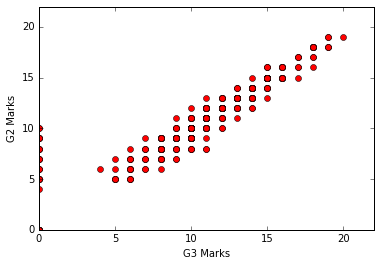

In [330]:
#Useful for Performance Prediction
plt.plot(g3,g2,'ro')
plt.axis(xmax = 22,ymax = 22)
plt.xlabel('G3 Marks')
plt.ylabel('G2 Marks')
c = np.corrcoef(g3,g2)
print("Correlation Matrix")
print(c)

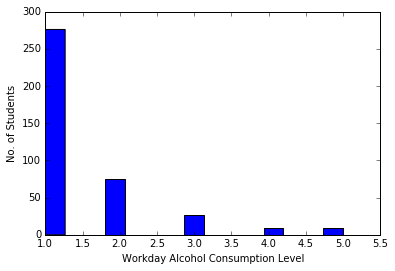

In [331]:
plt.hist(Dalco, bins = 15)
plt.xlabel('Workday Alcohol Consumption Level')
plt.ylabel('No. of Students')

Correlation Matrix
[[ 1.         -0.05466004]
 [-0.05466004  1.        ]]


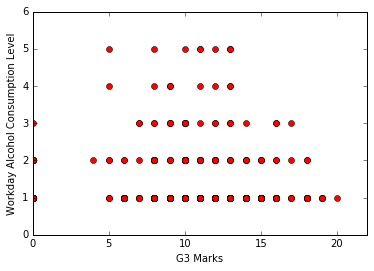

In [332]:
#Strong Factor
plt.plot(g3,Dalco,'ro')
plt.axis(xmax = 22,ymax = 6, ymin = 0)
plt.xlabel('G3 Marks')
plt.ylabel('Workday Alcohol Consumption Level')
c = np.corrcoef(g3,Dalco)
print("Correlation Matrix")
print(c)

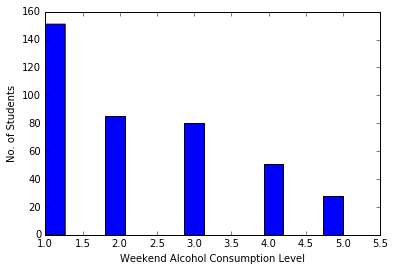

In [333]:
plt.hist(Walco, bins = 15)
plt.xlabel('Weekend Alcohol Consumption Level')
plt.ylabel('No. of Students')

Correlation Matrix
[[ 1.         -0.05193932]
 [-0.05193932  1.        ]]


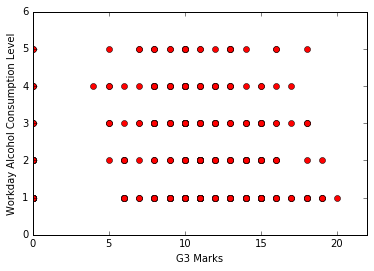

In [334]:
#Weak Factor
plt.plot(g3,Walco,'ro')
plt.axis(xmax = 22,ymax = 6, ymin = 0)
plt.xlabel('G3 Marks')
plt.ylabel('Workday Alcohol Consumption Level')
c = np.corrcoef(g3,Walco)
print("Correlation Matrix")
print(c)

In [339]:
# 16-20: 1, 14-15: 2, 12-13: 3, 10-11: 4, 0-9: 5
A = [16,17,18,19,20]
B = [14,15]
C = [12,13]
D = [10,11]
F = [0,1,2,3,4,5,6,7,8,9]
G1_grades = []
G2_grades = []
G3_grades = []
for index, row in df.iterrows():
    score = row['G1']
    if score in A:
        G1_grades.append(1)
    elif score in B:
        G1_grades.append(2)
    elif score in C:
        G1_grades.append(3)
    elif score in D:
        G1_grades.append(4)
    else:
        G1_grades.append(5)

for index, row in df.iterrows():
    score = row['G2']
    if score in A:
        G2_grades.append(1)
    elif score in B:
        G2_grades.append(2)
    elif score in C:
        G2_grades.append(3)
    elif score in D:
        G2_grades.append(4)
    else:
        G2_grades.append(5)
        
for index, row in df.iterrows():
    score = row['G3']
    if score in A:
        G3_grades.append(1)
    elif score in B:
        G3_grades.append(2)
    elif score in C:
        G3_grades.append(3)
    elif score in D:
        G3_grades.append(4)
    else:
        G3_grades.append(5)

for index, row in df.iterrows():
    inter = df['internet']
    if inter is 'yes':
        df['inter'] = 1
    else:
        df['inter'] = 0
    

In [340]:
df['G1_grades'] = G1_grades
df['G2_grades'] = G2_grades
df['G3_grades'] = G3_grades

In [341]:
df.head()

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,Walc,health,absences,G1,G2,G3,inter,G1_grades,G2_grades,G3_grades
0,1,GP,F,18,U,GT3,A,4,4,at_home,...,1,3,6,5,6,6,0,5,5,5
1,2,GP,F,17,U,GT3,T,1,1,at_home,...,1,3,4,5,5,6,0,5,5,5
2,3,GP,F,15,U,LE3,T,1,1,at_home,...,3,3,10,7,8,10,0,5,5,4
3,4,GP,F,15,U,GT3,T,4,2,health,...,1,5,2,15,14,15,0,2,2,2
4,5,GP,F,16,U,GT3,T,3,3,other,...,2,5,4,6,10,10,0,5,4,4


In [444]:
#DT All factors
g1g2 = []
for i in range(0,len(G1_grades)):
    g1g2.append([df['G1'][i],df['G2'][i],df['Medu'][i],df['Fedu'][i],df['Dalc'][i],df['Walc'][i],df['absences'][i],df['health'][i],df['traveltime'][i],df['inter'][i]])
g3 = list(df['G3_grades'])
X = g1g2
y = g3

clf = tree.DecisionTreeClassifier()
score = cross_val_score(clf,g1g2,g3)
print(score.mean())

0.663949191214


In [438]:
#Mother education, Daily Alcohol, Travel Time
g1g2 = []
for i in range(0,len(G1_grades)):
    g1g2.append([df['G1'][i],df['G2'][i],df['Medu'][i],df['Dalc'][i],df['traveltime'][i],])
X = g1g2
y = g3
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.4)
clf = tree.DecisionTreeClassifier()
score = cross_val_score(clf,g1g2,g3)
print(score.mean())

0.620095938394


In [437]:
#Daily Alcohol, Travel Time
g1g2 = []
for i in range(0,len(G1_grades)):
    g1g2.append([df['G1'][i],df['G2'][i],df['Dalc'][i],df['traveltime'][i]])
X = g1g2
y = g3
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.4)
clf = tree.DecisionTreeClassifier()
score = cross_val_score(clf,g1g2,g3)
print(score.mean())

0.660543144524


In [433]:
#Travel Time, internet
g1g2 = []
for i in range(0,len(G1_grades)):
    g1g2.append([df['G1'][i],df['G2'][i],df['traveltime'][i],df['inter'][i]])
X = g1g2
y = g3
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.4)
clf = tree.DecisionTreeClassifier()
score = cross_val_score(clf,g1g2,g3)
print(score.mean())

0.708723557784


In [455]:
#SVM
#All factors
g1g2 = []
for i in range(0,len(G1_grades)):
    g1g2.append([df['G1'][i],df['G2'][i],df['Medu'][i],df['Fedu'][i],df['Dalc'][i],df['Walc'][i],df['absences'][i],df['health'][i],df['traveltime'][i],df['inter'][i]])
g3 = list(df['G3_grades'])
X = g1g2
y = g3

clf = SVC()
score = cross_val_score(clf,g1g2,g3)
print(score.mean())

0.607351965948


In [456]:
#Mother education, Daily Alcohol, Travel Time
g1g2 = []
for i in range(0,len(G1_grades)):
    g1g2.append([df['G1'][i],df['G2'][i],df['Medu'][i],df['Dalc'][i],df['traveltime'][i]])
X = g1g2
y = g3
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.4)
clf = SVC()
score = cross_val_score(clf,g1g2,g3)
print(score.mean())

0.716147097747


In [450]:
#Daily Alcohol, Travel Time
g1g2 = []
for i in range(0,len(G1_grades)):
    g1g2.append([df['G1'][i],df['G2'][i],df['Dalc'][i],df['traveltime'][i]])
X = g1g2
y = g3
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.4)
clf = SVC()
score = cross_val_score(clf,g1g2,g3)
print(score.mean())

0.759468073607


In [457]:
#Travel Time
g1g2 = []
for i in range(0,len(G1_grades)):
    g1g2.append([df['G1'][i],df['G2'][i],df['traveltime'][i],df['inter'][i]])
X = g1g2
y = g3
clf = SVC()
score = cross_val_score(clf,g1g2,g3)
print(score.mean())

0.744006917848
